# travelTime Analysis

Different analyses of data collected using https://github.com/amadeuspzs/travelTime/blob/master/travelTime.py

In [7]:
%matplotlib inline
import pandas as pd, matplotlib.pyplot as plt, matplotlib.dates as dates, math
from datetime import datetime
from utils import find_weeks, find_days # custom
from pytz import timezone
from detect_peaks import detect_peaks
from ipywidgets import interact, interactive, fixed, interact_manual

## Load data

In [8]:
filename = 'data/home-montauk.csv'
tz = timezone('US/Eastern')
data = pd.read_csv(filename)
data.head(5)

,Timestamp,Duration(s)
0,1498920001,9472
1,1498920602,9498
2,1498921202,9646
3,1498921801,9698
4,1498922401,9679


Convert the unix timestamp to a datetime object:

In [9]:
data.Timestamp=data.apply(lambda row: datetime.fromtimestamp(int(row['Timestamp']),tz),axis=1)
data.head(5)

,Timestamp,Duration(s)
0,2017-07-01 10:40:01-04:00,9472
1,2017-07-01 10:50:02-04:00,9498
2,2017-07-01 11:00:02-04:00,9646
3,2017-07-01 11:10:01-04:00,9698
4,2017-07-01 11:20:01-04:00,9679


Add a new column with the duration in hours

In [10]:
data['Duration(h)']=data.apply(lambda row: float(row['Duration(s)'])/(60*60),axis=1)
data.head(5)

,Timestamp,Duration(s),Duration(h)
0,2017-07-01 10:40:01-04:00,9472,2.631111
1,2017-07-01 10:50:02-04:00,9498,2.638333
2,2017-07-01 11:00:02-04:00,9646,2.679444
3,2017-07-01 11:10:01-04:00,9698,2.693889
4,2017-07-01 11:20:01-04:00,9679,2.688611


Let's have a quick visualization:

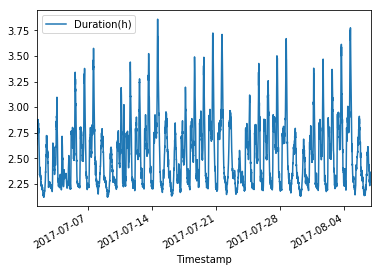

In [11]:
ax = data.plot(x='Timestamp',y='Duration(h)')

# Week by Week plots

Identify weeks in the dataset and plot them:

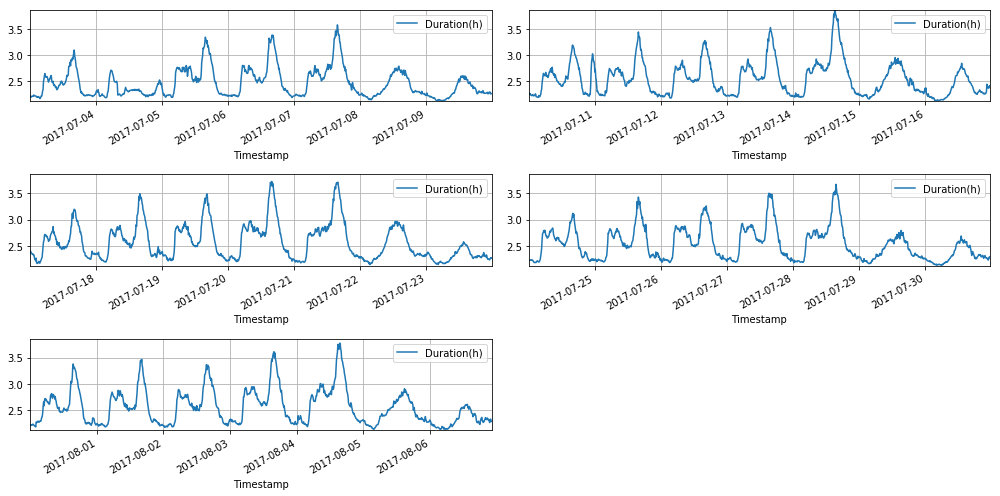

In [12]:
weeks = find_weeks(data)
num_cols = 2
num_rows = int(math.ceil(len(weeks) / float(num_cols)))
ylim = [min([min(data[week[0]:week[1]+1]['Duration(h)']) for week in weeks]), 
        max([max(data[week[0]:week[1]+1]['Duration(h)']) for week in weeks])]
plt.figure(1,figsize=(14, 7))
for e, week in enumerate(weeks):
    ax = plt.subplot(num_rows,num_cols,e+1)
    data.iloc[week[0]:week[1]].plot(x='Timestamp',y='Duration(h)',ax=ax)
    ax.grid()
    ax.set_ylim(ylim)
plt.tight_layout()

# Day plots

Pick a day to compare across weeks:

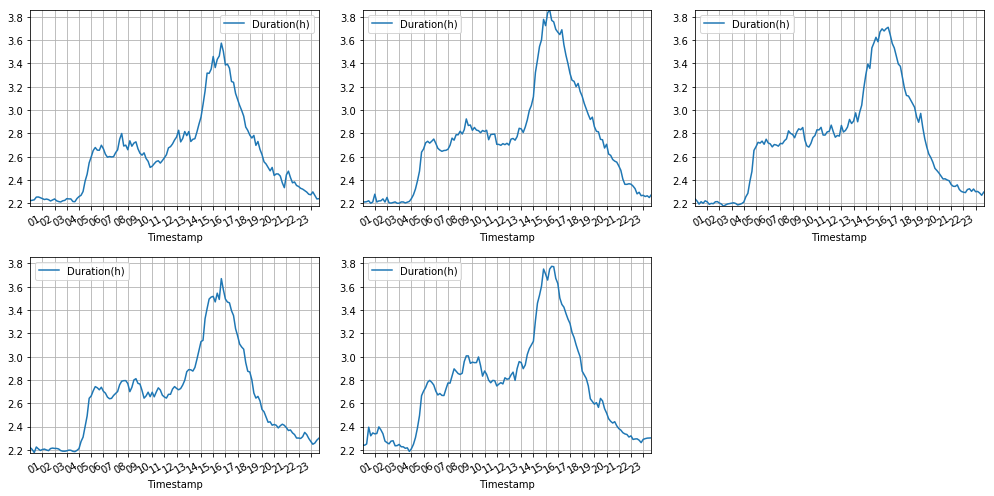

In [13]:
days = find_days(data,5)
num_cols = 3
num_rows = int(math.ceil(len(weeks) / float(num_cols)))
ylim = [min([min(data[day[0]:day[1]+1]['Duration(h)']) for day in days]), 
        max([max(data[day[0]:day[1]+1]['Duration(h)']) for day in days])]
plt.figure(1,figsize=(14, 7))

for e, day in enumerate(days):
    ax = plt.subplot(num_rows,num_cols,e+1)
    data.iloc[day[0]:day[1]].plot(x='Timestamp',y='Duration(h)',ax=ax)
    ax.xaxis.set_major_formatter(dates.DateFormatter('%H',tz))
    ax.xaxis.set_major_locator(dates.HourLocator(interval=1))
    ax.grid()
    ax.set_ylim(ylim)

plt.tight_layout()

## Peak/valley detection

Detect highs and lows

In [19]:
week = find_weeks(data)[2] # choose one week
week_data = data[week[0]:week[1]+1]
@interact(mpd=50,mph=1.0)
def peaks(mpd, mph):
    indexes = detect_peaks(week_data['Duration(h)'],mpd=mpd,mph=mph,show=True)
    for index in indexes:
        print week_data.iloc[[index]].Timestamp.dt.strftime("%a %H:%M").values[0]

In [21]:
@interact(mpd=130)
def peaks(mpd):
    indexes = detect_peaks(week_data['Duration(h)'],valley=True,mpd=mpd,show=True)
    for index in indexes:
        print week_data.iloc[[index]].Timestamp.dt.strftime("%a %H:%M").values[0]

## TODO
* Plot heatmap of worst/best times to leave
* Plot all weeks/days at once ala https://stackoverflow.com/questions/38197964/pandas-how-to-plot-multiple-time-series-into-a-single-plot-from-a-single-datafr
* Circular chart by hour of day for pm and am separately